<a href="https://colab.research.google.com/github/ggyuchive/MLpractice/blob/main/Introduction%20to%20Machine%20Learning/Supervised_Learning(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###지도학습  
**분류 (Classification)** : 가능성 있는 class label 중 하나를 예측  
**회귀 (Regression)** : 연속적인 실수를 예측

In [18]:
# import Numpy, Pandas, Matplotlib, Sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn

## 이진 분류 문제 (Binary Classification)

### Note 1.
**load_breast_cancer** 데이터 이용  
특성 30개 (569*30)  
malignant: 양성 / benign: 음성

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.feature_names)
print(cancer.target_names)
print(cancer.data.shape, cancer.target.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30) (569,)


In [20]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
    cancer.data, cancer.target, random_state = 0
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [22]:
cancer_df = pd.DataFrame(X_train, columns = cancer.feature_names)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9230769230769231

### Note 2.
Neighbors 수를 다르게 하여 knn 모델 생성 및 정확도 계산  
Neighbors 변화에 따른 정확도 그래프 표현  
Neighbor 수가 **적으면** : **과대적합** (train accuracy >> test accuracy)  
Neighbor 수가 **많으면** : **과소적합** (train accuracy == test accuracy)  
최적점은 n_neighbors=7로 판단 가능

In [24]:
train_accuracy = []
test_accuracy = []

maxn = 20
for n in range(1,maxn):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  train_accuracy.append(knn.score(X_train, y_train))
  test_accuracy.append(knn.score(X_test, y_test))

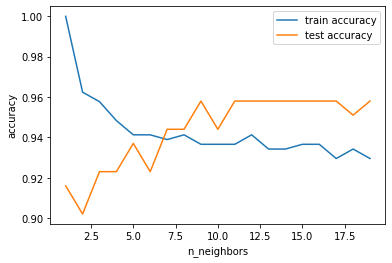

In [25]:
plt.plot(range(1,maxn), train_accuracy, label="train accuracy")
plt.plot(range(1,maxn), test_accuracy, label="test accuracy")
plt.ylabel("accuracy") 
plt.xlabel("n_neighbors")
plt.legend()

## 회귀 문제 (Regression)

### Note 1.
**load_diabetes** 데이터 이용  
특성 10개(442*10)  
예측값은 실수

In [26]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.keys())
print(diabetes.data.shape, diabetes.target.shape)
print(diabetes.feature_names)
diabetes.target[:10]

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

In [27]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [28]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Note 2.
예측 결과가 굉장히 나쁨  
회귀에서 socre은   
$score = R^2 = 1- {{\sum(y- 예측값)} \over {\sum(y- 평균)}} $  
(음수일 수도 있음)  
KNN에서 중요한 변수는 **거리 재는 법, 이웃의 수**  

In [29]:
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train), reg.score(X_test, y_test))

0.6238758317268587 0.18912404854026388


### Note 3.
회귀의 선형 모델  
$ \hat y = w[0] \times x[0] + ... + b $  
$x$는 특성, $w, b$는 모델이 학습하는 변수  

**최소제곱법** (Ordinary Least Squares)  

과대적합을 막기 위한 대안  
**리지** 회귀 (Ridge)  -> L2 규제  
$w[i]$가 0에 가깝도록 규제  

**라쏘** 회귀 (Lasso)  -> L1 규제  
$w[i]$가 0이 될 수 있음  (사용하는 특성을 고름)

In [30]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression().fit(X_train, y_train)

In [31]:
print(lrmodel.score(X_train, y_train), lrmodel.score(X_test, y_test))

0.555437148935302 0.35940090989715534


In [58]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge().fit(X_train, y_train)

In [59]:
print(ridgemodel.score(X_train, y_train), ridgemodel.score(X_test, y_test))

0.4625439622495925 0.35695757658096805


In [60]:
from sklearn.linear_model import Lasso
lassomodel = Lasso().fit(X_train, y_train)

In [61]:
print(lassomodel.score(X_train, y_train), lassomodel.score(X_test, y_test))

0.41412544493966097 0.27817828862078764


### Note 4.
라쏘는 계수가 0이 될 수 있음  
$alpha$값이 커질수록 규제 강화 ($w[i]$가 0에 가까워짐)

In [62]:
print(np.sum(ridgemodel.coef_ != 0), np.sum(lassomodel.coef_ != 0))

10 2


In [65]:
ridgemodel_10 = Ridge(alpha=10).fit(X_train, y_train)
ridgemodel_01 = Ridge(alpha=0.1).fit(X_train, y_train)

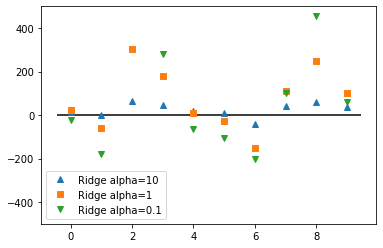

In [74]:
plt.plot(ridgemodel_10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridgemodel.coef_, 's', label="Ridge alpha=1")
plt.plot(ridgemodel_01.coef_, 'v', label="Ridge alpha=0.1")

plt.hlines(0, plt.xlim()[0], plt.xlim()[1])
plt.ylim(-500,500)

plt.legend()